Dataset Description:
         Updated On  State  Total Doses Administered      Sessions  \
count         7845   7845              7.621000e+03  7.621000e+03   
unique         213     37                       NaN           NaN   
top     16/01/2021  Delhi                       NaN           NaN   
freq            37    213                       NaN           NaN   
mean           NaN    NaN              9.188171e+06  4.792358e+05   
std            NaN    NaN              3.746180e+07  1.911511e+06   
min            NaN    NaN              7.000000e+00  0.000000e+00   
25%            NaN    NaN              1.356570e+05  6.004000e+03   
50%            NaN    NaN              8.182020e+05  4.547000e+04   
75%            NaN    NaN              6.625243e+06  3.428690e+05   
max            NaN    NaN              5.132284e+08  3.501031e+07   

              Sites   First Dose Administered  Second Dose Administered  \
count    7621.000000             7.621000e+03              7.621000e+03   

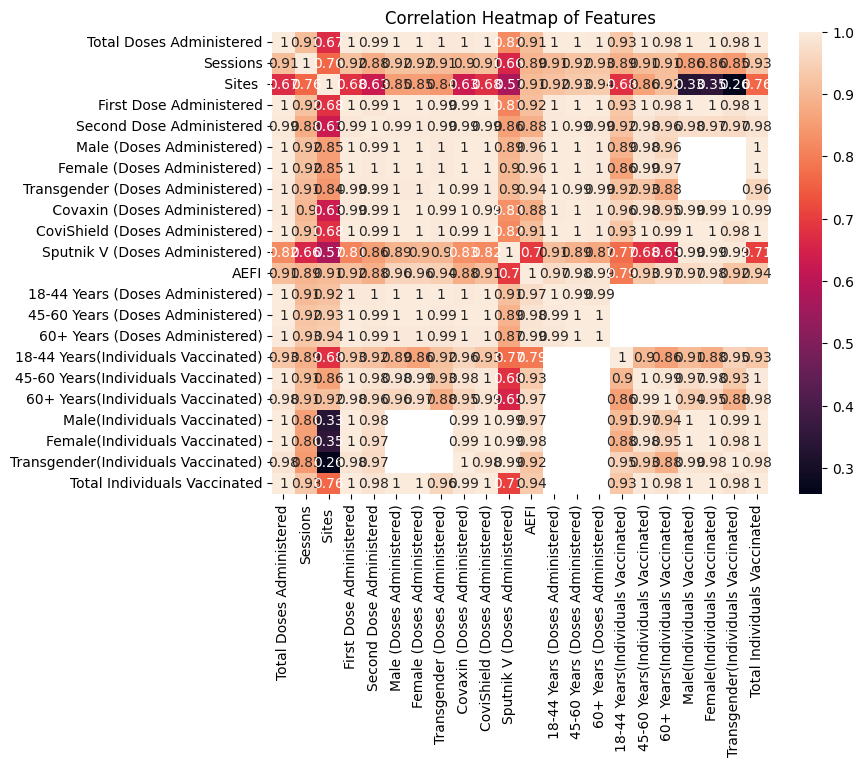

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_11428\2650005068.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_dose.index, y=first_dose.values, palette='Blues_d')


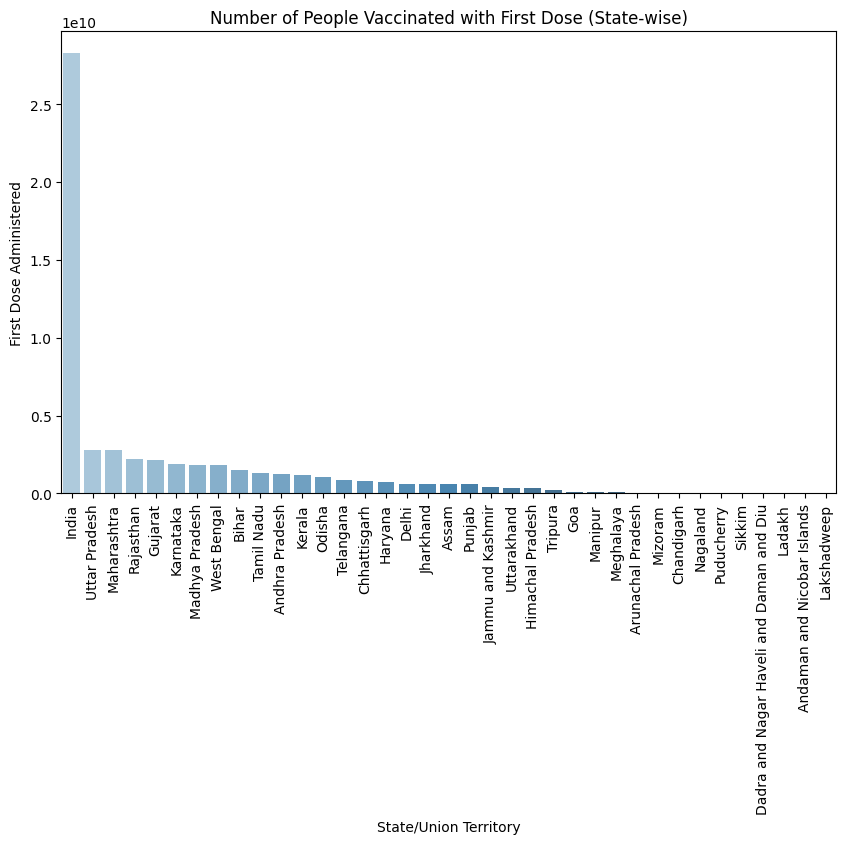

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_11428\2650005068.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=second_dose.index, y=second_dose.values, palette='Reds_d')


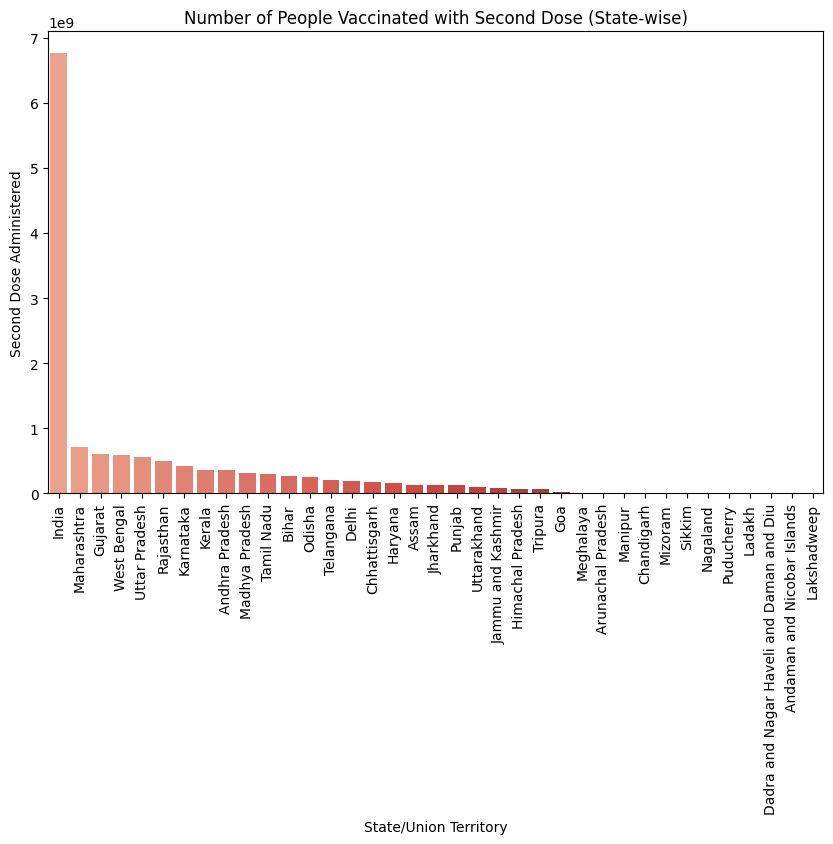


Sample of the dataset:
   Updated On  State  Total Doses Administered  Sessions   Sites   \
0  16/01/2021  India                   48276.0    3455.0   2957.0   
1  17/01/2021  India                   58604.0    8532.0   4954.0   
2  18/01/2021  India                   99449.0   13611.0   6583.0   
3  19/01/2021  India                  195525.0   17855.0   7951.0   
4  20/01/2021  India                  251280.0   25472.0  10504.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN             

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "D://DSML PRACTICAL//Datasets//Covid Vaccine Statewise.csv"
df = pd.read_csv(file_path)

# a. Describe the dataset
description = df.describe(include='all')
print("Dataset Description:\n", description)

# Visualizing the summary with a heatmap for quick insights (correlation matrix)
# Select only numeric columns for the heatmap
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# b. Number of persons state-wise vaccinated for the first dose
first_dose = df.groupby('State')['First Dose Administered'].sum().sort_values(ascending=False)

# Using sns.barplot for the first dose data visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=first_dose.index, y=first_dose.values, palette='Blues_d')
plt.title("Number of People Vaccinated with First Dose (State-wise)")
plt.xlabel("State/Union Territory")
plt.ylabel("First Dose Administered")
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.show()

# c. Number of persons state-wise vaccinated for the second dose
second_dose = df.groupby('State')['Second Dose Administered'].sum().sort_values(ascending=False)

# Using sns.barplot for the second dose data visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=second_dose.index, y=second_dose.values, palette='Reds_d')
plt.title("Number of People Vaccinated with Second Dose (State-wise)")
plt.xlabel("State/Union Territory")
plt.ylabel("Second Dose Administered")
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.show()

# Optional: Print a sample of the first few rows to ensure clarity of data
print("\nSample of the dataset:")
print(df.head())


In [4]:
first_dose

State
India                                       2.826214e+10
Uttar Pradesh                               2.788411e+09
Maharashtra                                 2.784364e+09
Rajasthan                                   2.201044e+09
Gujarat                                     2.131646e+09
Karnataka                                   1.873330e+09
Madhya Pradesh                              1.796605e+09
West Bengal                                 1.796450e+09
Bihar                                       1.470503e+09
Tamil Nadu                                  1.288533e+09
Andhra Pradesh                              1.232861e+09
Kerala                                      1.193845e+09
Odisha                                      1.032633e+09
Telangana                                   8.803206e+08
Chhattisgarh                                7.960029e+08
Haryana                                     7.557984e+08
Delhi                                       6.243395e+08
Jharkhand                

In [6]:
import pandas as pd

# Load the dataset
file_path = 'D://DSML PRACTICAL//Datasets//Covid Vaccine Statewise.csv'  # Update the file path
data = pd.read_csv(file_path)

# a. Describe the dataset
print("Dataset Description:")
print(data.describe(include='all'))  # Provides summary for numeric and categorical data
print("\nColumns and Data Types:")
print(data.info())

# b. Number of persons state-wise vaccinated for the first dose in India
first_dose_statewise = data.groupby("State")["First Dose Administered"].sum().reset_index()
first_dose_statewise.rename(columns={"First Dose Administered": "Total First Doses"}, inplace=True)
print("\nState-wise First Dose Vaccination Data:")
print(first_dose_statewise)

# c. Number of persons state-wise vaccinated for the second dose in India
second_dose_statewise = data.groupby("State")["Second Dose Administered"].sum().reset_index()
second_dose_statewise.rename(columns={"Second Dose Administered": "Total Second Doses"}, inplace=True)
print("\nState-wise Second Dose Vaccination Data:")
print(second_dose_statewise)

# Save results to CSV
first_dose_statewise.to_csv("statewise_first_dose.csv", index=False)
second_dose_statewise.to_csv("statewise_second_dose.csv", index=False)
print("\nResults saved as 'statewise_first_dose.csv' and 'statewise_second_dose.csv'")


Dataset Description:
        Updated On  State  Total Doses Administered      Sessions  \
count         7845   7845              7.621000e+03  7.621000e+03   
unique         213     37                       NaN           NaN   
top     16/01/2021  Delhi                       NaN           NaN   
freq            37    213                       NaN           NaN   
mean           NaN    NaN              9.188171e+06  4.792358e+05   
std            NaN    NaN              3.746180e+07  1.911511e+06   
min            NaN    NaN              7.000000e+00  0.000000e+00   
25%            NaN    NaN              1.356570e+05  6.004000e+03   
50%            NaN    NaN              8.182020e+05  4.547000e+04   
75%            NaN    NaN              6.625243e+06  3.428690e+05   
max            NaN    NaN              5.132284e+08  3.501031e+07   

              Sites   First Dose Administered  Second Dose Administered  \
count    7621.000000             7.621000e+03              7.621000e+03   



Results saved as 'statewise_first_dose.csv' and 'statewise_second_dose.csv'


In [7]:
df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


(0, 24)